## **In this homework, you can only use numpy! No Pytorch, no mxnet, no "autograd" of any kind. You must compute gradients yourself and implement all optimizers yourself from scratch.**



# Problem 1

Consider the following function:
$$f(x, y) = x^2 + 10y^2$$
A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

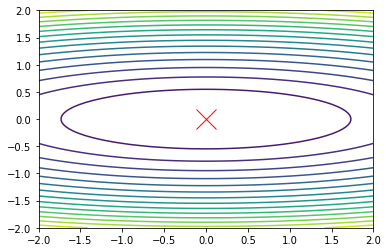

In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

## Problem 1.1
1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```



In [131]:
# function f(x, y)
def f(x, y):
    fxy = x**2 + 10*y**2
    return fxy

# gradient of f(x,y)
def grad_f(x, y):
    grad_x = 2*x
    grad_y = 20*y
    return grad_x, grad_y

In [132]:
# gradient descent
def gradient_descent(x, y, lr, num_iter):
    # array to store x and y at each iteration
    x_values = [x]
    y_values = [y]

    # gradient descent
    for i in range(num_iter):
        # compute the gradients
        grad_x, grad_y = grad_f(x, y)
        # update the x and y
        x = x - lr * grad_x
        y = y - lr * grad_y
        # store the x and y
        x_values.append(x)
        y_values.append(y)
    
    # print the final x and final y
    print("x: ", x, "   ", "y: ", y)
    
    # return x_values and y_values
    return x_values, y_values

In [133]:
# initial point
x = 2
y = 1
# learning rate
lr = 0.103
# number of iterations
num_iter = 20

x_values, y_values = gradient_descent(x, y, lr, num_iter)

x:  0.019835358042352216     y:  3.207135472212838


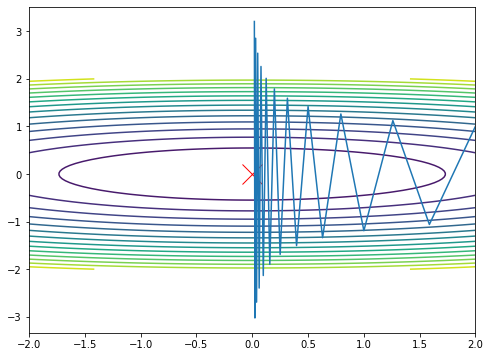

In [134]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- As we can see, when the learning rate equals to 0.103, the optimization diverges.

In [135]:
# initial point
x = 2
y = 1
# learning rate
lr = 0.09
# number of iterations
num_iter = 20

x_values, y_values = gradient_descent(x, y, lr, num_iter)

x:  0.037783922636262415     y:  0.01152921504606845


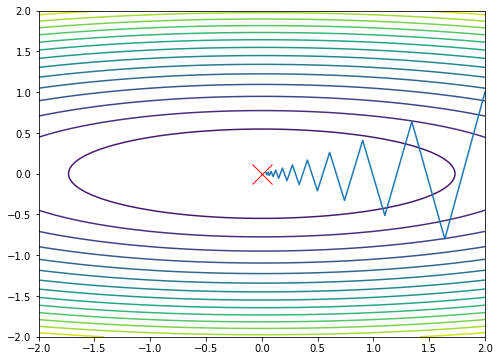

In [136]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- As we can see, when the learning rate equals to 0.09, the optimization reaches the minimum in at most 20 iterations. At this time, the error in the `x` direction is 0.0378, and the error in the `y` direction is 0.0115. This result is "good".

## Problem 1.2

2. Show (via derivation through calculus, not through coding) that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newton-s-method) will converge to the minimum in a single step.

**Solution:**

The gradient of this function is

$$
\nabla f(x,y) = 
\begin{pmatrix}
2x & 20y
\end{pmatrix}
$$

The Hessian Matrix of this function is

$$ H(f) = 
\begin{pmatrix}
\frac{\partial^{2}f}{\partial x^{2}} & \frac{\partial^{2}f}{\partial x \partial y} \\
\frac{\partial^{2}f}{\partial y \partial x} & \frac{\partial^{2}f}{\partial y^{2}}
\end{pmatrix}
= 
\begin{pmatrix}
2 & 0 \\
0 & 20
\end{pmatrix}
$$

So, the inverse of this Hessian Matrix is

$$
H^{-1} = 
\begin{pmatrix}
1/2 & 0 \\
0 & 1/20
\end{pmatrix}
$$

According to Newton's Method, for any $(x, y)$ we obtain  

$$\varepsilon = -H^{-1}\nabla f(x,y) =
-
\begin{pmatrix}
1/2 & 0 \\
0 & 1/20
\end{pmatrix}
\times
\begin{pmatrix}
2x & 20y
\end{pmatrix}
=
-(x,y)
$$

Therefore, we can see that in this case, the Newton's Method optimization algorithm converges to the minimum of the function in a single step.


## Problem 1.3
3. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

- Let's first define where convergence is. According to the best result we found on the first question, the error in the `x` direction is 0.0378, and the error in the `y` direction is 0.0115, so the sum of the errors is 0.0493. Therefore, **let us define that if the sum of error in `x` direction and `y` direction of the result after iteration is less than 0.0493, it is considered to converge**.

In [137]:
# momentum optimizer
def momentum_optimizer(x, y, momentum_hyperparameter, lr, num_iter):
    # initialize velocity
    v = np.array([0., 0.])

    # array to store x and y at each iteration
    x_values = [x]
    y_values = [y]

    # iteration
    for i in range(num_iter):
        # compute v
        v = momentum_hyperparameter * v + np.array(grad_f(x, y))
        # update the x and y
        x = x - lr * v[0]
        y = y - lr * v[1]
        # store the x and y
        x_values.append(x)
        y_values.append(y)
    
    # print the final x and final y
    print("x: ", x, "   ", "y: ", y)
    
    # return x_values and y_values
    return x_values, y_values


In [138]:
# initial point
x = 2
y = 1
# momentum hyperparameter
momentum_hyperparameter = 0.9
# learning rate (hard to find a good one)
lr = 0.006
# number of iterations
num_iter = 20

x_values, y_values = momentum_optimizer(x, y, momentum_hyperparameter, lr, num_iter)

x:  0.015299082103002695     y:  0.2383274227910249


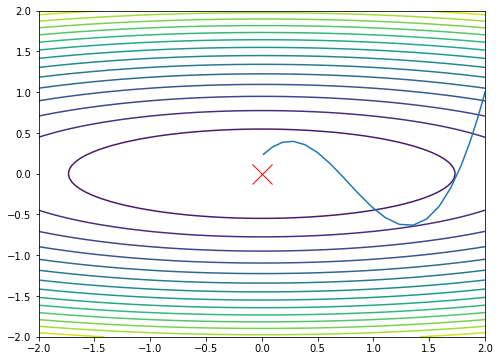

In [139]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- I find that it is hard to find a learning rate that allows momentum to converge in less than 20 steps.

In [140]:
# initial point
x = 2
y = 1
# momentum hyperparameter
momentum_hyperparameter = 0.9
# learning rate (largest)
lr = 0.18
# number of iterations
num_iter = 100

x_values, y_values = momentum_optimizer(x, y, momentum_hyperparameter, lr, num_iter)

x:  0.010334167236924038     y:  0.016844160324137922


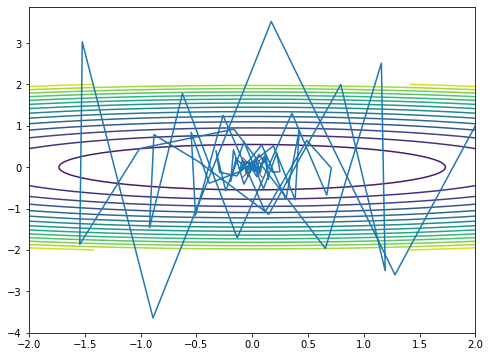

In [141]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- When optimizing for 100 steps and still converging near the minimum, I find that the largest learning rate is 0.18.

In [142]:
# initial point
x = 2
y = 1
# momentum hyperparameter
momentum_hyperparameter = 0.9
# learning rate (smallest)
lr = 0.0014
# number of iterations
num_iter = 100

x_values, y_values = momentum_optimizer(x, y, momentum_hyperparameter, lr, num_iter)

x:  0.04115854292940825     y:  -0.004802114596464966


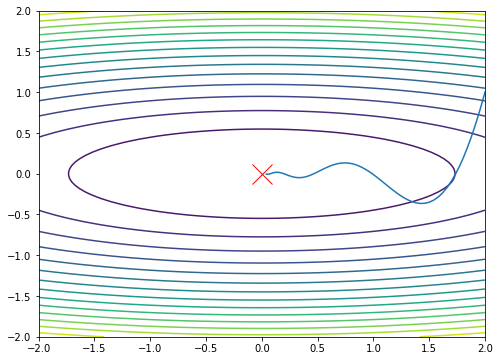

In [143]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- When optimizing for 100 steps and still converging near the minimum, I find that the smallest learning rate is 0.0014. 

## Problem 1.4
4. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

In [144]:
# Adam optimizer
def adam_optimizer(x, y, beta_1, beta_2, epsilon, lr, num_iter):
    # initialize v and s
    v = np.array([0., 0.])
    s = np.array([0., 0.])

    # array to store x and y at each iteration
    x_values = [x]
    y_values = [y]

    # iteration
    for i in range(num_iter):
        # compute v and s
        v = beta_1 * v + (1 - beta_1) * np.array(grad_f(x, y))
        s = beta_2 * s + (1 - beta_2) * np.array(grad_f(x, y)) * np.array(grad_f(x, y))

        # re-normalize
        v_hat = v / (1 - beta_1 ** (i+1))
        s_hat = s / (1 - beta_2 ** (i+1))
        
        # rescale the gradient
        g_rescale = lr * v_hat / (np.sqrt(s_hat) + epsilon)
        
        # update x and y
        x = x - g_rescale[0]
        y = y - g_rescale[1]

        # store the x and y
        x_values.append(x)
        y_values.append(y)
    
    # print the final x and final y
    print("x: ", x, "   ", "y: ", y)
    
    # return x_values and y_values
    return x_values, y_values

In [146]:
# initial point
x = 2
y = 1
# hyperparameters
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-6
# learning rate
lr = 0.001
# number of iterations
num_iter = 4000

x_values, y_values = adam_optimizer(x, y, beta_1, beta_2, epsilon, lr, num_iter)

x:  0.016184704905939505     y:  6.888444427655276e-08


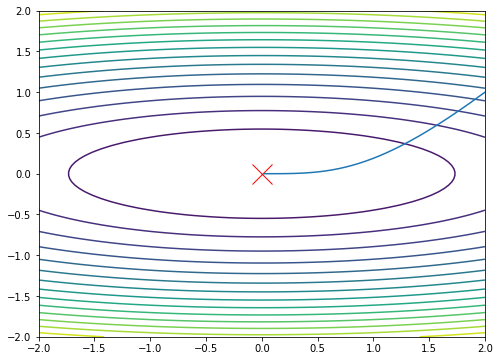

In [147]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- As we can see, it takes 4000 steps for Adam to converge with these hyperparameters. 


In [148]:
# initial point
x = 2
y = 1
# hyperparameters
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-6
# learning rate
lr = 0.18
# number of iterations
num_iter = 100

x_values, y_values = adam_optimizer(x, y, beta_1, beta_2, epsilon, lr, num_iter)

x:  -0.006072448015939988     y:  0.0008736129295865479


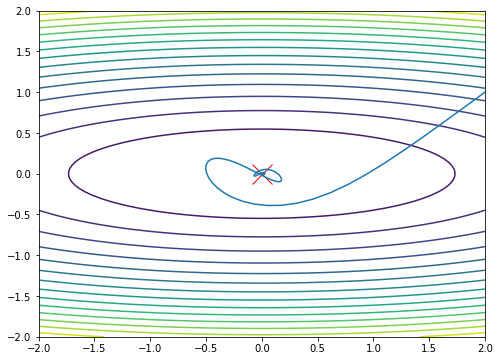

In [149]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- As we can see, Adam can converge in 100 steps with this value of η, and can get a better result. 

# Problem 2

Now, consider minimization of the ["three-hump camel function"](https://www.sfu.ca/~ssurjano/camel3.html):

$$f(x, y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

This function also has a minimum at $(0, 0)$. Below is a contour plot.

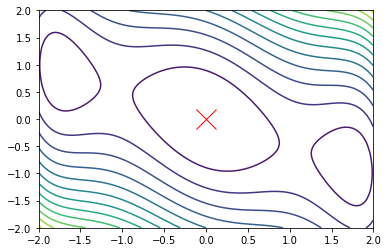

In [150]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
plot_contour()

As in the first problem, assume that optimization starts from $x = 2, y = 1$. Try minimizing it with SGD, Adam, and Momentum, while only changing the learning rate for each (not the momentum or other hyperparameters). Try to find an optimizer and learning rate that can reach the **global** minimum in as few steps as possible.

In [151]:
# function f(x, y)
def f(x, y):
    fxy = 2*x**2 - 1.05*x**4 + 1/6*x**6 + x*y + y**2
    return fxy

# gradient of f(x,y)
def grad_f(x, y):
    grad_x = x**5 - 4.2*x**3 + 4*x + y
    grad_y = x + 2*y
    return grad_x, grad_y

## SGD optimizer

In [152]:
# initial point
x = 2
y = 1
# learning rate
lr = 0.25
# number of iterations
num_iter = 3

x_values, y_values = gradient_descent(x, y, lr, num_iter)

x:  0.009375045981035541     y:  -0.019631191406250054


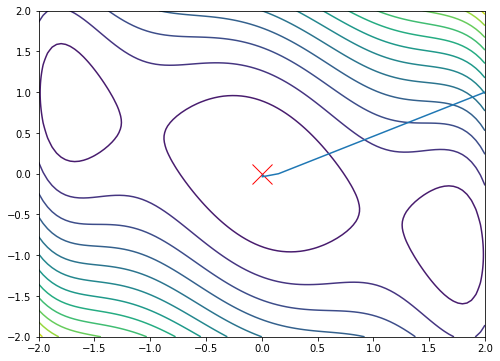

In [153]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

## Momentum optimizer

In [154]:
# initial point
x = 2
y = 1
# momentum hyperparameter
momentum_hyperparameter = 0.9
# learning rate
lr = 0.05
# number of iterations
num_iter = 70

x_values, y_values = momentum_optimizer(x, y, momentum_hyperparameter, lr, num_iter)

x:  0.025640799089348146     y:  0.00697914108713598


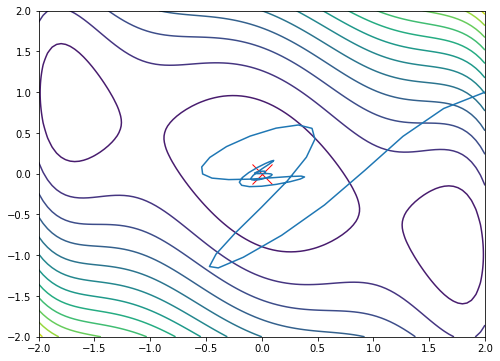

In [155]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

## Adam optimizer

In [156]:
# initial point
x = 2
y = 1
# hyperparameters
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-6
# learning rate
lr = 0.2
# number of iterations
num_iter = 50

x_values, y_values = adam_optimizer(x, y, beta_1, beta_2, epsilon, lr, num_iter)

x:  0.005675329680312053     y:  0.02363781540327553


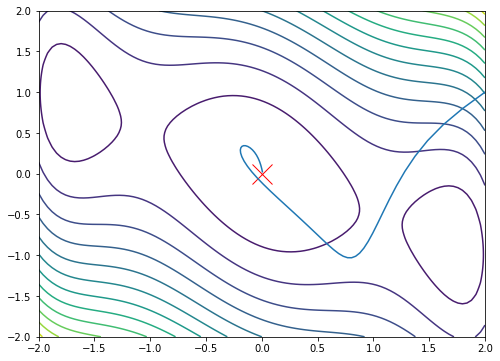

In [157]:
# plot
plt.figure(figsize=(8, 6))
plot_contour()
plt.plot(x_values, y_values, '-')
plt.show()

- Therefore, SGD optimizer with learning rate 0.25 can reach the global minimum in as few steps as possible.